# Overview
In Milestone One, you will use machine learning models to complete data analysis and evaluation of multiple datasets.
Each week’s content will cover a new topic or revisit topics from previous Mods. Using the project that you selected in
Module B, you will apply each week’s topic(s) and perform multiple analyses on your project’s datasets. Your work should
be reflected in your weekly Jupyter Notebook homework. Your project will be solved individually, and your solutions will be
submitted as an individual summary document in Week 7.

In this course, there are no specific questions to answer in your Jupyter Notebook files; your general goal is to analyze
your data using the methods you have learned in this course and in this program, and to draw interesting conclusions
based on the project you have chosen. In some cases, you may already have a clear question you want to answer based
solely on what you see in your data set. In other cases, you may need to explore multiple methods and analyses before
determining which questions should or need to be answered.

This is an iterative process; one that is designed to be self-governed and open-ended. As you complete each milestone,
you are developing the narrative behind the data set and, by the time you are ready to complete your Integrated Capstone
Project, determining the key questions that a client related to your project would be interested in having answered.

## Requirements
1. A statement or description of the chosen project

2. An explanation of information learned from using the following modeling techniques. Furthermore, you must select
one to two of these weeks (a–f) to discuss in a thorough and interesting way:
- Polynomial and interaction terms (Week 1) X
- Lasso, ridge, elastic net regression (Week 2)
- Forward and backward selection, principal component regression (PCR), partial least squares regression
(PLSR) (Week 3)
- Logistic regression and feature scaling (Week 4)
- Support vector machines, the kernel trick, and regularization for support vector machines (Week 5) X
- Decision Trees and Random Forests X 

3. For each topic above (2a–2f), an explanation of the following (as applicable to your dataset):
- How did you avoid overfitting?
    - You should mention the techniques used to prevent overfitting, why these techniques were expected to be helpful, and the results.
- What metric(s) did you use, and what was the result? Did you use any hyperparameter tuning?
    - You should describe the metrics and hyperparameter tuning performed to determine hyperparameters and include a discussion of the meaning of these parameters.
- What aspects of the results were expected or unexpected?
- How did your Exploratory Data Analysis help with the modeling?
- What sources did you rely on, apart from the course materials, to learn about this model.
    - In this context, it is expected that you will find external sources, such as free educational URLs, and share and discuss them with other students through YellowDig.

4. Specific and supported conclusions drawn from the models.
- How has your work up to this point helped address any research questions or other questions of interest?
- Provide an explanation as to how you know the conclusions are true, potentially addressing any or all of the topics mentioned in Requirement 3 (i.e., overfitting, metrics, etc.)
    - This explanation should show that:
        - The conclusions are true from a quantitative perspective, and
        - Explain why the conclusions are relevant and/or important.

In each case, it is up to you to choose and/or emphasize the items that are most interesting to talk about, but you must strive for both breadth and depth. That is, your grade will be based on:
- Breadth: Briefly discussing all of the topics in Requirement 2, and
- Depth: Choosing and discussing 1–2 weeks’ topics in a very thorough and interesting way. Make sure you explicitly state in your document which topics you are delving deeply into explaining.

Checklist 6/27:
1. Settle on our 3 Datasets - get them in csv and have them ready to go,
2. Ensure that weeks 1 - 6 cover all topics for all 3 datasets - feed results to o4-mini-high, ask it to draw conclusions. 
3. Ensure our markdown in the homework contains ready-to-go work for paper writing tomorrow 

## Polynomial and Interaction Terms

### Introduction:
- As my datasets are primarily classification-based, I had to construct a dataset for linear regression purposes. Using a detailed set of play-level information, I attempted to predict the number of yards gained or lost on any given play in the dataset. 
- The dataset contained numeric features, such as the number of yards required to reach a first down, the absolute yard line number, and the number of defensive players immediately around the line of scrimage  continuous variables such as the down (from 1 - 4), and categorical features as one-hot columns, such as the home or away team playing, the type of play such as run or pass, and information associated with the outcome, such as if a sack occured or if the attempted pass was incomplete.
- The dataset ended up being heavily skewed toward 0 yards gained, Because the target is so lopsided (a big spike of plays around a central value and a long tail of rare big gains/losses), a plain‐vanilla least-squares regressor will tend to get “pulled” toward that dense region and do poorly on the extremes.
- Both the full dataset (120 columns) and a cutdown version of the dataset were used in an sm.OLS regressor, producing similar $R^2$ values of around 0.33. The sm.OLS Summary was then used to analyze the p-values of the model coefficients, showing a number of features both positively correlated (such as down, yardsToGo, yardlineNumber, and pff_playAction), and negatively correlated (such as incomplete passes, interceptions, or sacks).
- SKlearns polynomial features were used to create polynomial and interaction terms, then reapply the model. Neither improved model performance
- VIF analysis was performed on the dataset, with the categorical and onehot columns showing significant VIF values. Removing those features from the dataset actually decreased model performance. 
### avoiding overfitting
- The base OLS model showed signs of overfitting on extreme positive and negative values in the dataset. Dropping outliers improved model performance to an $R^2$ of .4496

### Metrics used
- R^2, p-value, f-statistic, VIF

### Expected and Unexpected Results:
- Expected:
    - The play-level data showed stronger than expected correlation with the target variable, despite all of the noise not captured in the dataset.
    - strong negative and positive indicators in the feature set that might lead to a positive or negative play result in qays that seem to align with common knowledge of the game of football. 
- Unexpected:
    - Some game level information, such as a QB hit, were actually a positive drivers of play result, rather than negative. 

### Lasso, ridge, elastic net regression (Week 2)
- Introduction:
    - Continued to use the yards gained regression model with outliers removed, but expanded to all features of the dataset. 
    - Used GridSearchCV as a wrapper to run Ridge, Lasso, and Elasticnet regression and produce optimal alpha parameters.
    - Analysis was then performed on the predicted vs actual values and redisual distributions for the 3 best models. 
    - Results:
        - All results are similar to our OLS performance, but the introduction of cross validation suggests improved model generalization.
        - Ridge needed a large alpha of $\alpha = 35.622$ to control overfitting across all 122 features in the dataset. 
        - Lasso/ENet settled use a small $\alpha ~0.04$, reflecting that only a light shrinkage gave the best bias–variance tradeoff.
        - The optimal Elasticnet l1 ratio of 0.9 signified that L1 was used heavily to reduced the impact of weak coefficeints, with a small L2 component to stabilize correlated groups. 


- Avoiding Overfitting:
    - Test-Train-Split, gridsearchcv used to avoid overfitting
- Metrics Used:
    - $R^2$, $\alpha$, $MSE$, L1 Ratio
- Hyperparameter Tuning:
    - Tuned the following in each model - Ridge = Alpha, Lasso: alpha, ElasticNet : Alpha, l1_ratio
- Expected vs Unexpected Results:
    - Improved peformance when the gain/loss is small - becaus the bulk of plays produce relatively small gains or losses, our model performance is much better on these values. 
    - Large gains or losses perform poorly, largely due to their sparsity in the dataset
    - All 3 models over-predict negative plays 
    

### Forward and backward selection, principal component regression (PCR), partial least squares regression (PLSR) (Week 3) (Deep Dive 1)
- Introduction:
    - Forward and Backward Selection Performed on the play_result dataset using a technique from professor Snyder's Machine Learning class from this past spring semester. Dataset was then evaluated for lowest negative mean squared error against a sklearn linear regression model. Each combination of features was evalutaed using 5-fold cross validation to avoid overfitting and improve model generalization. The best feature set was then evaluated. PCR and PLSR were then applied to the best selection of features.
- Results:
    - Forward Selection:
        - Stops at 22 features, right where adding more gives diminishing returns.
        - You end up with a compact model that hits the lowest CV MSE (≈ 35).
        - On held-out test the model performs about the same, suggesting good generalization. 
        - After the core eight or so, it tacks on a few coverage‐type flags and the two most informative team indicators (`MIA`, `LA`).
    - Backward Selection:
        -  Starts with everything and peels off the least-useful one by one.
        - Hits its sweet spot when it has removed about half the features— leaving 51 still in the model.
        - CV performance bottoms out at an almost identical level (∼ 35 MSE), but test error creeps up slightly.
        - Because it keeps in things like `yardsToGo`, `preSnapVisitorScore`, `defendersInBox`, `hurry/sack metrics`, a whole slew of team dummies, and an assortment of coverage‐type flags, you end up with a `much larger` feature set for almost no gain.
        - Top signals are the same in both: Top signals are the same in both: pass­result, yardline, play action, drop-back type, back-field block, and a handful of coverage flags. 
        - Backward selection overfits a bit—it hogs dozens more features (many low-signal team indicators and nuance flags) without driving down error
    - PCR/PLSR
        - Methodology: Choose best featureset,then apply PCA to the data. PCR and PLSR modles were then fit to the data and evaluated against the test set. Initial analysis attempted to reduce to only 1 PC. GridSearchCV was then used to obtain the optimal number of principal components and alpha values for PCR, and the optimal number of components for the PLS model.
        - 1 component: PCR (1 PC) is doing essentially unsupervised dimensionality reduction, so its first component has very little alignment with the target—hence the low $R^2 \approx 0.118$. PLS (1 component) explicitly finds the direction in $X$  that maximizes covariance with $y$ so it gets a much higher $R^2 \approx 0.331$.
        - GridSearchCV: Optimal PCR uses 20 principal components with a Ridge penalty of $\alpha = 10$, giving a cross-validated $R^2 \approx 0.204$. Optimal PLS finds that 10 PLS components yield $R^2 \approx 0.456$/ That confirms what we saw before: even with more components, PCR lags behind PLS, because PCR’s components aren’t informed by the target.
- Avoiding Overfitting
    - Train-Test-Split, KFold CV used to avoid overfitting and improve model generalization, which was not an issue during evaluation.
- Metrics Used:
    - NegMeanSquared Error, CV MSE, $R^2$
- HyperParameter Tuning:
    - PCR - n_components, alpha, PLS, N_components
- Expected vs Unexpected Results:

### Logistic regression and feature scaling (Week 4)
#### Introduction:
- Returned to the injury prediction models. both the punt_analytics injury prediction model, and the playing surface analytics datasets were valuated using logistic regression to predict the likelihood of an injury event. Additional analysis was then performed on the misclassified samples in each dataset to look for trends.

#### Results:

**Play Surface Analytics:**

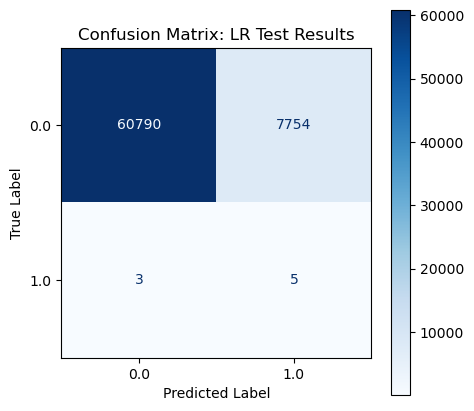

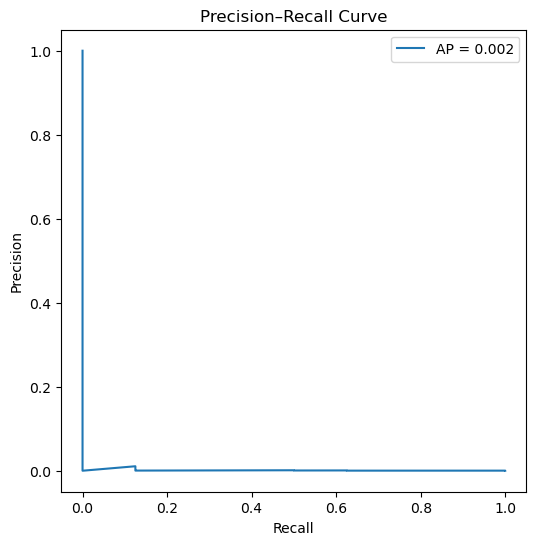

- Looking at the confusion matrix and and classification report, this is actually pretty good: 
    - Recall (sensitivity) = TP / (TP + FN) = 5 / (5+3) ≈ 0.625
    - Precision = TP / (TP + FP) = 5 / (5+7754) ≈ 0.0006
- That tiny precision reflects how few of the “injury” predictions are actually correct (because the dataset is extremely imbalanced), while recall of ~62.5% means you’re catching about two-thirds of the true injuries.
- However the false positive rate is pretty high. let's try some tuning and see if we can improve the model a bit, first up the penalty parameter (and switching over to cuml for speed)

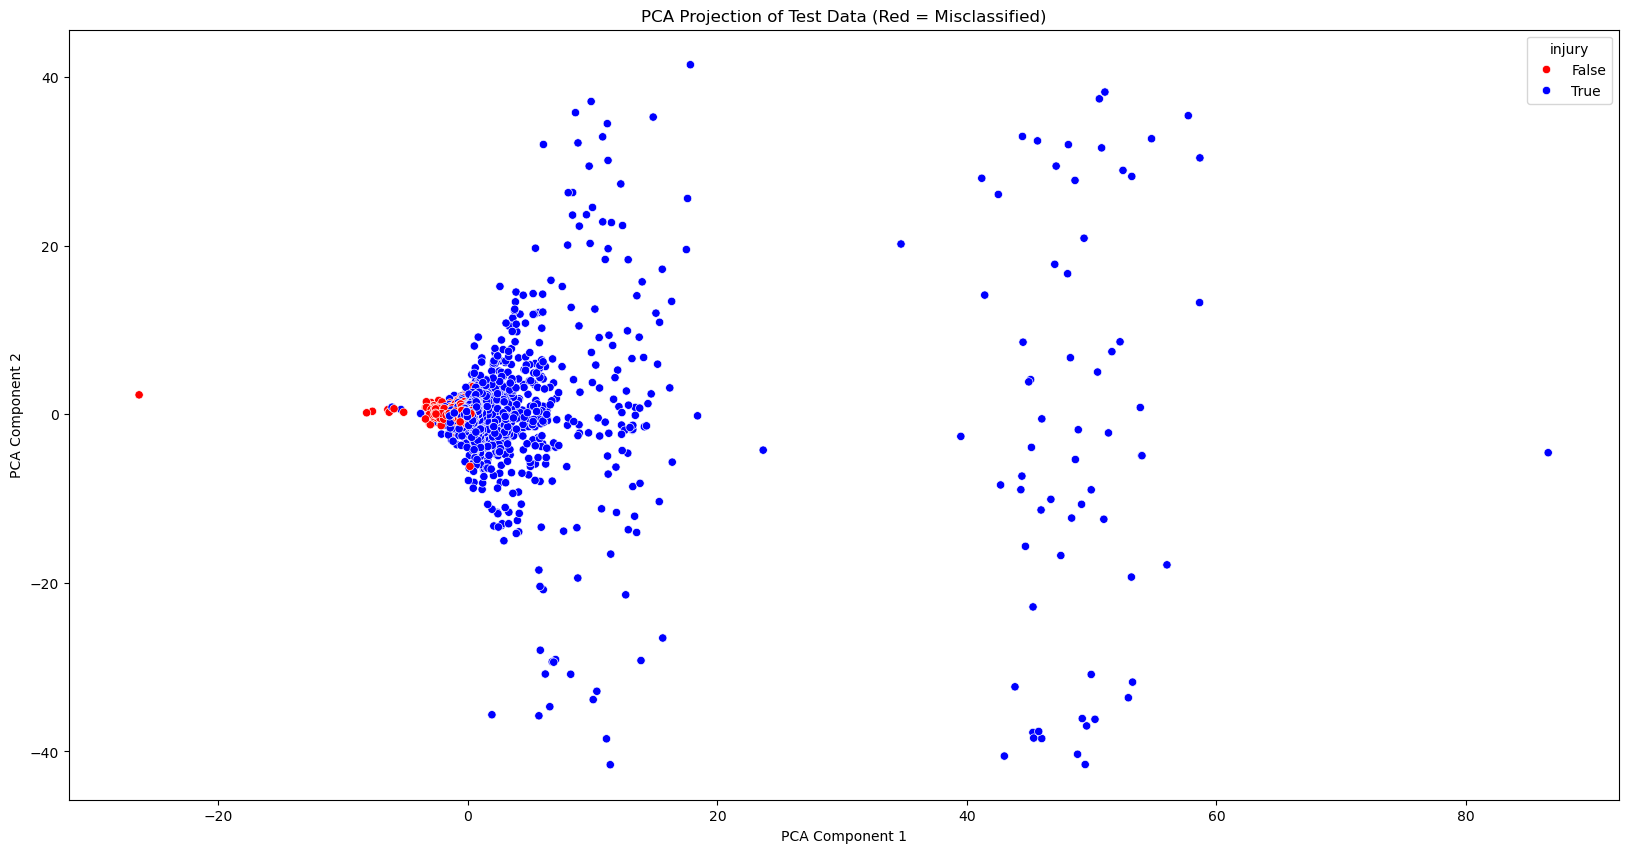

You’re right – seeing those dense blobs in PC-space is a big clue that there’s some low-dimensional structure your model could exploit. The trade-off you’re observing (lots of false positives) often means your decision boundary in the full feature space is over-zealous. Here are a few concrete next steps you could try:

#### Avoiding Overfitting:
k-fold cross validation with leaveoneout was used to avoid model overfitting 

#### HyperParameter Tuning:
class weight, solver, iteration tuning applied 

#### Expected vs Unexpecte Results
- Poor performance with high false positive rates

### Support vector machines, the kernel trick, and regularization for support vector machines (Week 5) (Deep Dive 2)

#### Introduction:
The motion data was scaled, a SVM model was fit to the dataset. All modeling was evaluated using the default sklearn confusion matrix and classification report to focus on performance on the minority class.

SVM models can be evaluated using the regular evaluation methods in SKlearn for classifiers, such as confusion matrix, F1, recall, balanced accuracy score, ROC-AUC, which will give a better picture of model performance.

The untuned confusion matrix produced the following results:

Confusion Matrix:
[[53374     0]
 [   18     6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53374
           1       1.00      0.25      0.40        24

    accuracy                           1.00     53398
   macro avg       1.00      0.62      0.70     53398
weighted avg       1.00      1.00      1.00     53398

This is actually suprisingly good for an untuned model given this dataset: 25% injury events correctly idenfied is more or less in line with our tuned random forest classifier. 

Let's go ahead and adjust the model to handle our imbalanced classes better. 

Here we've set class weight to `balanced` to make the SVM pay more attention to the rare injury cases.

Under the hood this sets:

$$w_i \; = \; \frac{n_{samples}}{n_{classes} \times n_i}$$

for each class $i$, so the injury class gets a very high weight. 

Confusion Matrix:
[[53194   180]
 [   17     7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53374
           1       0.04      0.29      0.07        24

    accuracy                           1.00     53398
   macro avg       0.52      0.64      0.53     53398
weighted avg       1.00      1.00      1.00     53398

Ok slightly better (29% injury class accuracy), but we've introduced some false positives into the mix (top right corner)

The SVM was then tuned, to optimize the regularization parameters using c_values of [0.1, 1.0, 10.0, 100.0, 1000.0] and the 'poly', 'rbf' and 'sigmoid' kernels, 

#### Results:

#### Avoiding Overfitting:

#### HyperParameter Tuning:

#### Expected vs Unexpecte Results
